In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, k
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

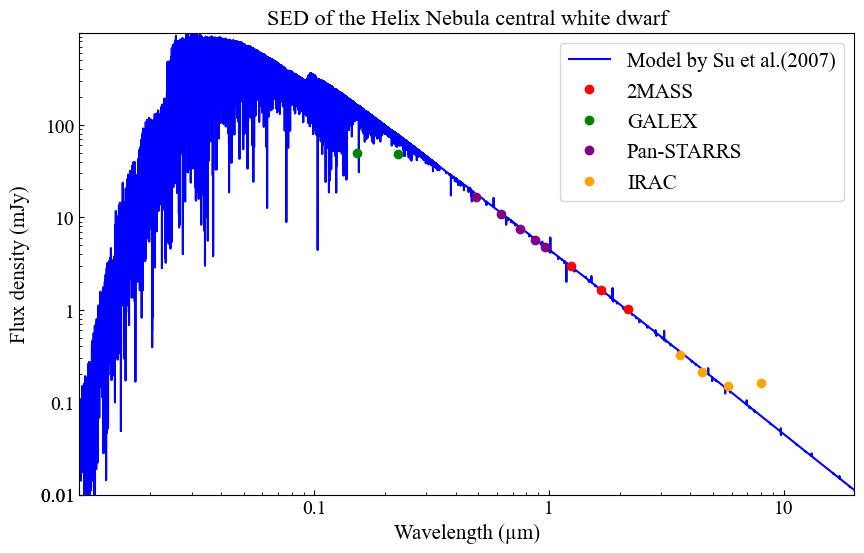

In [2]:
# Function to convert Angstroms to microns
def angstrom_to_microns(wavelength_angstrom):
    return wavelength_angstrom / 1e4

# Function to convert flux density from erg/s/cm^2/Angstrom to mJy
def flux_density_to_mjy(flux_density, wavelength_angstrom):
    # Convert wavelength from Angstrom to meters for the conversion
    wavelength_m = wavelength_angstrom * 1e-10
    # Convert flux density using the factor (1e26) to get from erg/s/cm^2/Hz to Jy and then to mJy
    # and using c / lambda^2 to convert from per Angstrom to per Hz (since F_lambda dlambda = F_nu dnu)
    flux_density_mjy = flux_density * 1e26 * wavelength_m**2 / c
    return flux_density_mjy

# Load the model data from the file
file_path_3 = '/Users/leylaiskandarli/Desktop/spectral data/wd_110000g68 (1).txt'
model_data_3 = pd.read_csv(file_path_3, sep='\s+', header=None)

wavelength_model_microns3 = angstrom_to_microns(model_data_3[0])
flux_density_model_mJy3 = flux_density_to_mjy(model_data_3[1], model_data_3[0])

# Helix central white dwarf SED data 
data = [
    ("J", "2MASS", 1.235, 2.949091973),
    ("H", "2MASS", 1.662, 1.637947421),
    ("K", "2MASS", 2.159, 1.010951812),
    ("FUV", "GALEX", 0.1516, 49.89146411),
    ("NUV", "GALEX", 0.2267, 48.80072217),
    ("g", "Pan-STARRS", 0.4866, 16.41444673),
    ("r", "Pan-STARRS", 0.6215, 10.74747018),
    ("i", "Pan-STARRS", 0.7545, 7.549292436),
    ("z", "Pan-STARRS", 0.8679, 5.704088419),
    ("y", "Pan-STARRS", 0.9633, 4.767670674),
    ("IRAC", "IRAC", 3.6, 0.325),
    ("IRAC", "IRAC", 4.5, 0.213),
    ("IRAC", "IRAC", 5.8, 0.148),
    ("IRAC", "IRAC", 8, 0.16)
]

# Organizing the data for plotting
catalogs = set()  # To keep track of the catalogs we have
wavelengths = []
flux_densities = []
symbols = []  # To keep track of the symbols
for band, catalog, wavelength, flux_density in data:
    wavelengths.append(wavelength)
    flux_densities.append(flux_density)
    symbols.append(band)
    catalogs.add(catalog)


# Creating the plot with a corrected legend
plt.figure(figsize=(10, 6))
#Scale Factor
scale_factor_3 = 5.868831492892263e-14

# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue', label='Model by Su et al.(2007)')

# Define marker styles and colors for each catalog
catalog_styles = {
    '2MASS': ('o', 'red'), 
    'GALEX': ('o', 'green'), 
    'Pan-STARRS': ('o', 'purple'),
    'WISE': ('o', 'orange'), 
    'IRAC': ('o', 'orange')
}

# To keep track of which catalogs have been added to the legend
catalogs_added = set()

# Plot each point
for band, catalog, wavelength, flux_density in data:
    marker, color = catalog_styles[catalog]
    if catalog not in catalogs_added:
        plt.loglog(wavelength, flux_density, marker=marker, color=color, linestyle='', label=catalog)
        catalogs_added.add(catalog)
    else:
        plt.loglog(wavelength, flux_density, marker=marker, color=color, linestyle='', label='_nolegend_')

# Plot 
plt.xlabel('Wavelength (µm)', fontsize=15)
plt.ylabel('Flux density (mJy)', fontsize=15)
plt.title('SED of the Helix Nebula central white dwarf', fontsize=16)
plt.loglog()  # Using log-log scale due to the wide range of values
plt.legend(fontsize="small")
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))
# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=14)
# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])
plt.legend(fontsize=15)
plt.show()

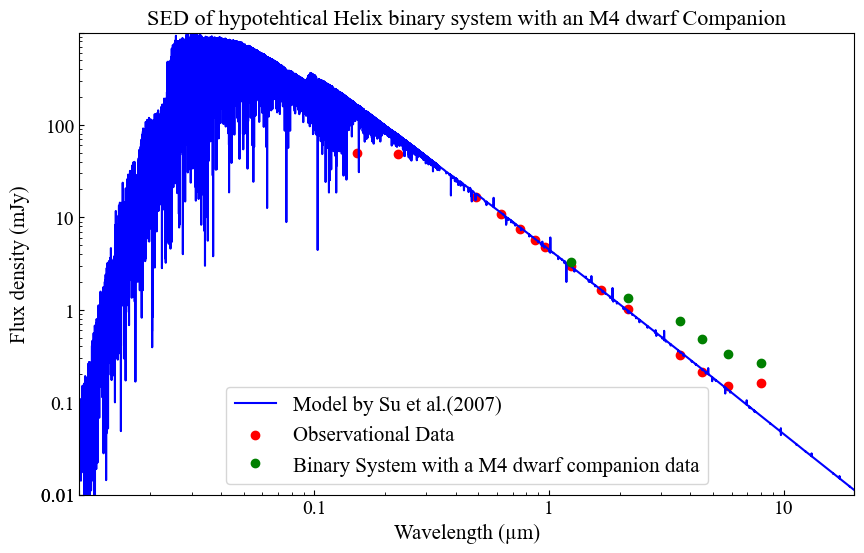

In [3]:
#M4 Dwarf Companion 
# Load the data from the provided content
data = {
    "Band": ["J", "K", "3.6", "4.5", "5.8", "8.0"],
    "Wavelength (microns)": [1.235, 2.159, 3.6, 4.5, 5.8, 8.0],
    "Flux density (mJy)": [ 3.252902289,1.330138415,0.754206153, 0.485058486, 0.33031065, 0.265283156],
}

# Observational data
obs_wavelengths = np.array([
    1.235, 1.662, 2.159, 0.1516, 0.2267, 0.4866, 0.6215, 0.7545, 0.8679, 0.9633,
    24, 70, 3.6, 4.5, 5.8, 8
])
obs_flux_densities = np.array([
    2.949091973, 1.637947421, 1.010951812, 49.89146411, 48.80072217, 16.41444673,
    10.74747018, 7.549292436, 5.704088419, 4.767670674, 48.4, 224, 0.325, 0.213, 0.148, 0.16
])

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Error bars: yerr will be the flux density error
# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue', label = 'Model by Su et al.(2007)')

# Plot the observational data as scatter points
plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Observational Data')


plt.errorbar(df['Wavelength (microns)'], df['Flux density (mJy)'],  fmt='o', color='green', capsize=5, label = 'Binary System with a M4 dwarf companion data')

plt.title('SED of hypotehtical Helix binary system with an M4 dwarf Companion', fontsize = "16")
plt.xlabel('Wavelength (µm)', fontsize="15")
plt.ylabel('Flux density (mJy)', fontsize = "15")
plt.loglog() 
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=14)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])
plt.legend(fontsize="15")
# Display the plot
plt.show()

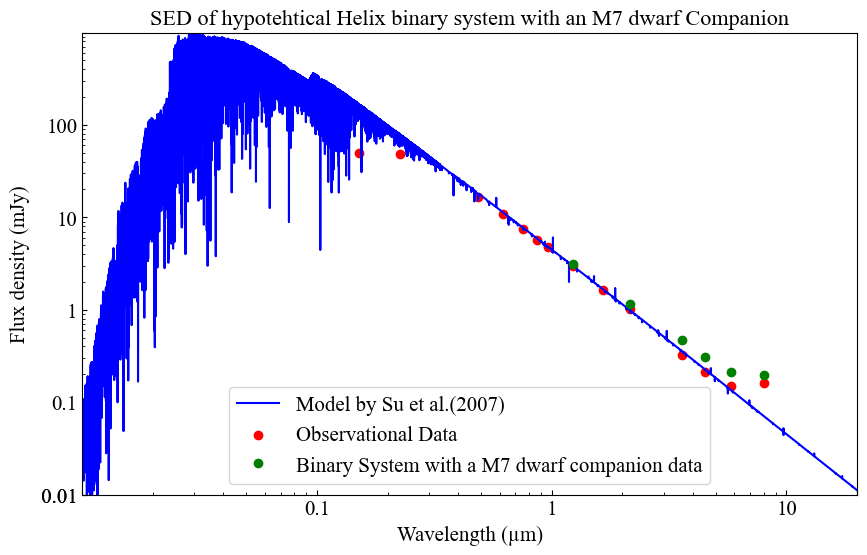

In [4]:
#M7 Dwarf Companion 
# Load the data from the provided content
data = {
    "Band": ["J", "K", "3.6", "4.5", "5.8", "8.0"],
    "Wavelength (microns)": [1.235, 2.159, 3.6, 4.5, 5.8, 8.0],
    "Flux density (mJy)": [ 3.094504733,1.163724125,0.465820519, 0.307332703, 0.214192996, 0.198402447],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Error bars: yerr will be the flux density error
# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue', label = 'Model by Su et al.(2007)')

# Plot the observational data as scatter points
plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Observational Data')


plt.errorbar(df['Wavelength (microns)'], df['Flux density (mJy)'],  fmt='o', color='green', capsize=5, label = 'Binary System with a M7 dwarf companion data')

plt.title('SED of hypotehtical Helix binary system with an M7 dwarf Companion', fontsize = "16")
plt.xlabel('Wavelength (µm)', fontsize = "15")
plt.ylabel('Flux density (mJy)', fontsize = "15")
plt.loglog() 
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=15)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])
plt.legend(fontsize = "15")
# Display the plot
plt.show()

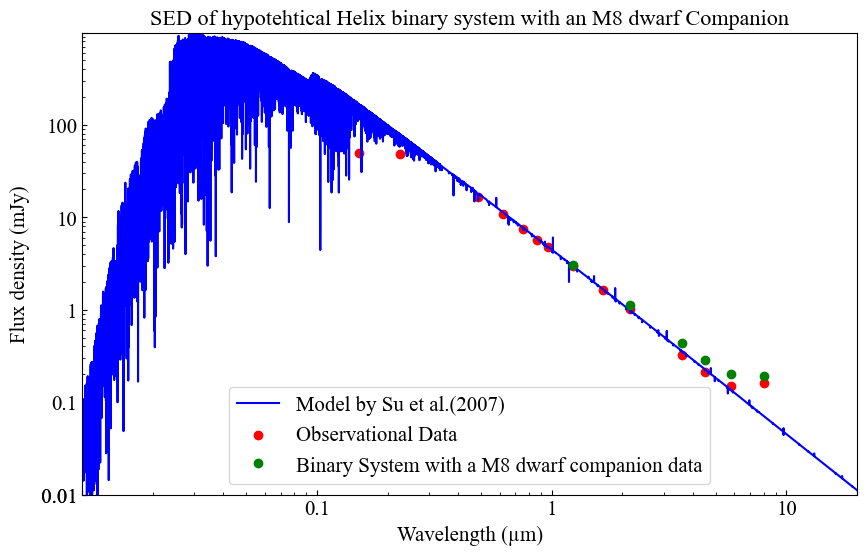

In [5]:
#M8 Dwarf Companion 
#Load the data from the provided content
data = {
    "Band": ["J", "K", "3.6", "4.5", "5.8", "8.0"],
    "Wavelength (microns)": [1.235, 2.159, 3.6, 4.5, 5.8, 8.0],
    "Flux density (mJy)": [ 3.049693024,1.126841463,0.434816081, 0.285889048, 0.200578966, 0.191071262],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Error bars: yerr will be the flux density error
# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue', label = 'Model by Su et al.(2007)')

# Plot the observational data as scatter points
plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Observational Data')


plt.errorbar(df['Wavelength (microns)'], df['Flux density (mJy)'],  fmt='o', color='green', capsize=5, label = 'Binary System with a M8 dwarf companion data')

plt.title('SED of hypotehtical Helix binary system with an M8 dwarf Companion', fontsize = "16")
plt.xlabel('Wavelength (µm)', fontsize = "15")
plt.ylabel('Flux density (mJy)', fontsize = "15")
plt.loglog() 
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=15)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])
plt.legend(fontsize = "15")
# Display the plot
plt.show()

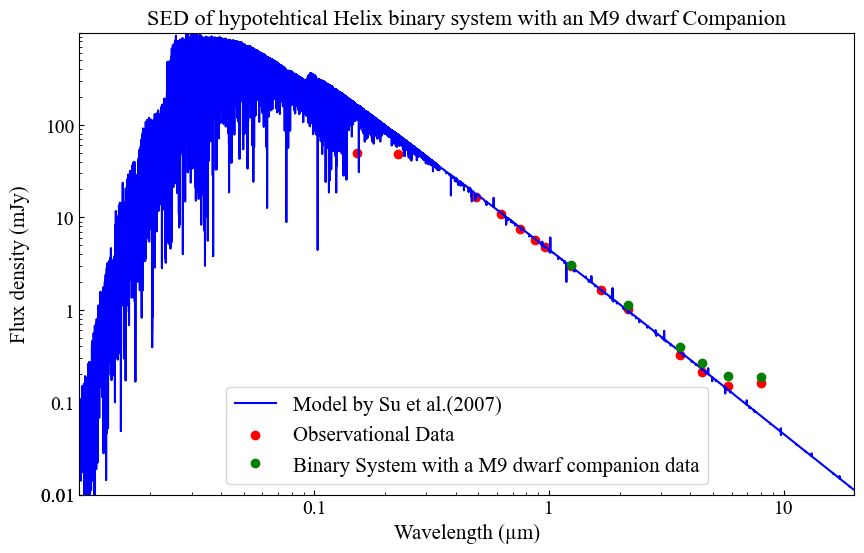

In [6]:
#M9 Dwarf Companion 
#Load the data from the provided content
data = {
    "Band": ["J", "K", "3.6", "4.5", "5.8", "8.0"],
    "Wavelength (microns)": [1.235, 2.159, 3.6, 4.5, 5.8, 8.0],
    "Flux density (mJy)": [ 3.025405674,1.11664443,0.393024591, 0.267282804, 0.189382054, 0.186813833],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Error bars: yerr will be the flux density error
# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue', label = 'Model by Su et al.(2007)')

# Plot the observational data as scatter points
plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Observational Data')


plt.errorbar(df['Wavelength (microns)'], df['Flux density (mJy)'],  fmt='o', color='green', capsize=5, label = 'Binary System with a M9 dwarf companion data')

plt.title('SED of hypotehtical Helix binary system with an M9 dwarf Companion', fontsize = "16")
plt.xlabel('Wavelength (µm)', fontsize = "15")
plt.ylabel('Flux density (mJy)', fontsize = "15")
plt.loglog() 
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=14)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])
plt.legend(fontsize = "15")
# Display the plot
plt.show()

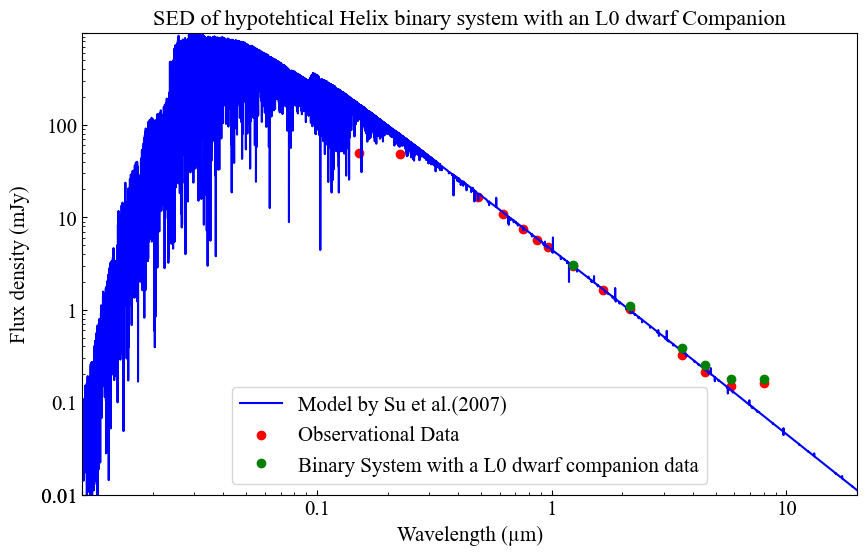

In [7]:
#L0 Dwarf Companion 
#Load the data from the provided content
data = {
    "Band": ["J", "K", "3.6", "4.5", "5.8", "8.0"],
    "Wavelength (microns)": [1.235, 2.159, 3.6, 4.5, 5.8, 8.0],
    "Flux density (mJy)": [ 3.012566945,1.098863102,0.383703763, 0.252324416, 0.177431476, 0.17907036],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Error bars: yerr will be the flux density error
# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue', label = 'Model by Su et al.(2007)')

# Plot the observational data as scatter points
plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Observational Data')


plt.errorbar(df['Wavelength (microns)'], df['Flux density (mJy)'],  fmt='o', color='green', capsize=5, label = 'Binary System with a L0 dwarf companion data')

plt.title('SED of hypotehtical Helix binary system with an L0 dwarf Companion', fontsize = "16")
plt.xlabel('Wavelength (µm)', fontsize = "15")
plt.ylabel('Flux density (mJy)', fontsize = "15")
plt.loglog() 
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=15)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])
plt.legend(fontsize = "15")
# Display the plot
plt.show()

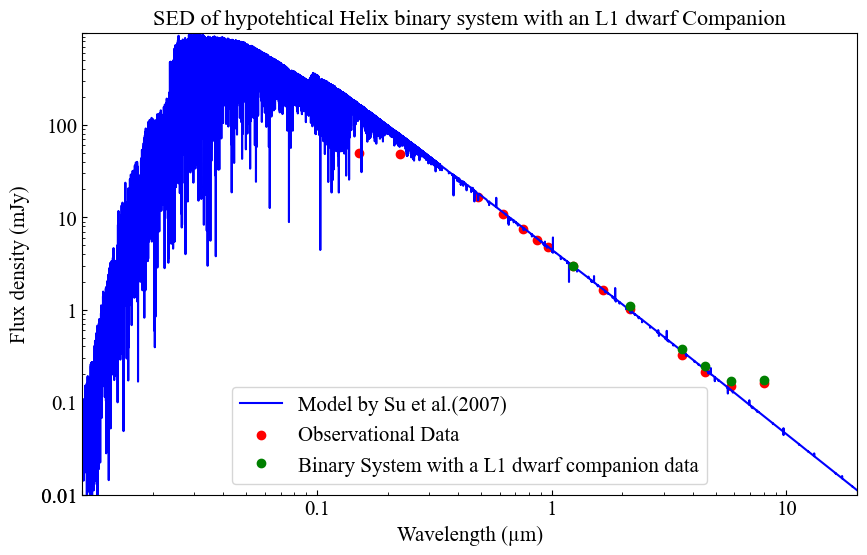

In [8]:
#L1 Dwarf Companion 
#Load the data from the provided content
data = {
    "Band": ["J", "K", "3.6", "4.5", "5.8", "8.0"],
    "Wavelength (microns)": [1.235, 2.159, 3.6, 4.5, 5.8, 8.0],
    "Flux density (mJy)": [ 2.997242663,1.084073238,0.371630056, 0.244236494, 0.170532638, 0.174333719],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Error bars: yerr will be the flux density error
# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue', label = 'Model by Su et al.(2007)')

# Plot the observational data as scatter points
plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Observational Data')


plt.errorbar(df['Wavelength (microns)'], df['Flux density (mJy)'],  fmt='o', color='green', capsize=5, label = 'Binary System with a L1 dwarf companion data')

plt.title('SED of hypotehtical Helix binary system with an L1 dwarf Companion', fontsize = "16")
plt.xlabel('Wavelength (µm)', fontsize = "15")
plt.ylabel('Flux density (mJy)', fontsize = "15")
plt.loglog() 
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=15)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])
plt.legend(fontsize = "15")
# Display the plot
plt.show()

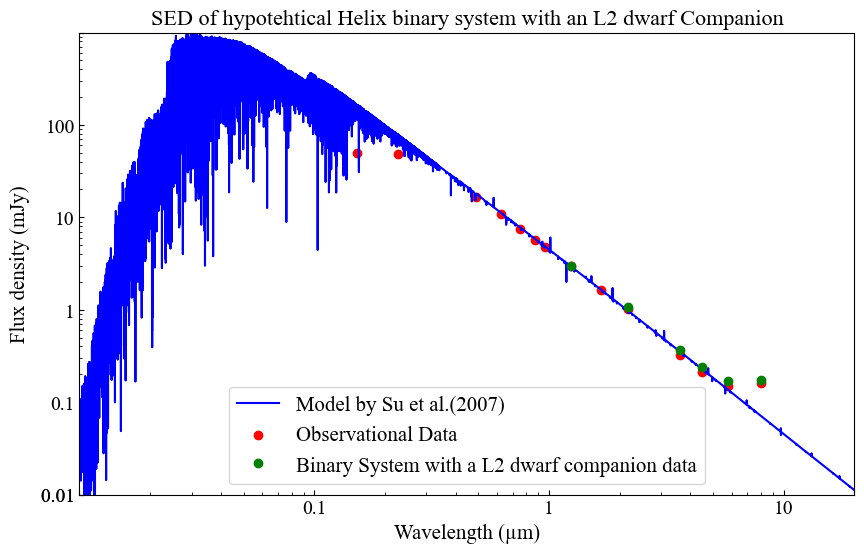

In [9]:
#L2 Dwarf Companion 
#Load the data from the provided content
data = {
    "Band": ["J", "K", "3.6", "4.5", "5.8", "8.0"],
    "Wavelength (microns)": [1.235, 2.159, 3.6, 4.5, 5.8, 8.0],
    "Flux density (mJy)": [ 2.985618007,1.066420086,0.369531358, 0.24228615, 0.170326058, 0.174735297],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Error bars: yerr will be the flux density error
# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue', label = 'Model by Su et al.(2007)')

# Plot the observational data as scatter points
plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Observational Data')


plt.errorbar(df['Wavelength (microns)'], df['Flux density (mJy)'],  fmt='o', color='green', capsize=5, label = 'Binary System with a L2 dwarf companion data')

plt.title('SED of hypotehtical Helix binary system with an L2 dwarf Companion', fontsize = "16")
plt.xlabel('Wavelength (µm)', fontsize = "15")
plt.ylabel('Flux density (mJy)', fontsize = "15")
plt.loglog() 
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=14)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])
plt.legend(fontsize = "15")
# Display the plot
plt.show()

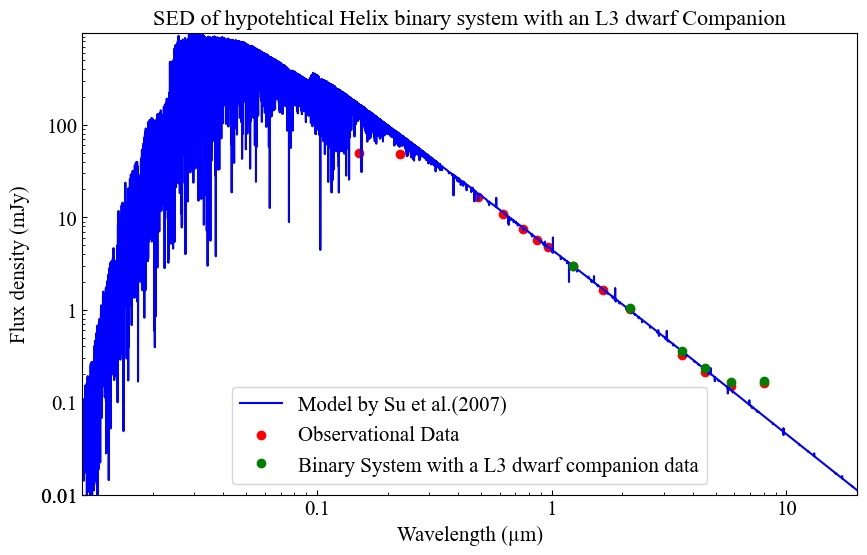

In [10]:
#L3 Dwarf Companion 
#Load the data from the provided content
data = {
    "Band": ["J", "K", "3.6", "4.5", "5.8", "8.0"],
    "Wavelength (microns)": [1.235, 2.159, 3.6, 4.5, 5.8, 8.0],
    "Flux density (mJy)": [ 2.976799803,1.053028801,0.361363522, 0.236695304, 0.165734218, 0.171229461],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Error bars: yerr will be the flux density error
# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue', label = 'Model by Su et al.(2007)')

# Plot the observational data as scatter points
plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Observational Data')


plt.errorbar(df['Wavelength (microns)'], df['Flux density (mJy)'],  fmt='o', color='green', capsize=5, label = 'Binary System with a L3 dwarf companion data')

plt.title('SED of hypotehtical Helix binary system with an L3 dwarf Companion', fontsize = "16")
plt.xlabel('Wavelength (µm)', fontsize = "15")
plt.ylabel('Flux density (mJy)', fontsize = "15")
plt.loglog() 
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=15)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])
plt.legend(fontsize = "15")
# Display the plot
plt.show()

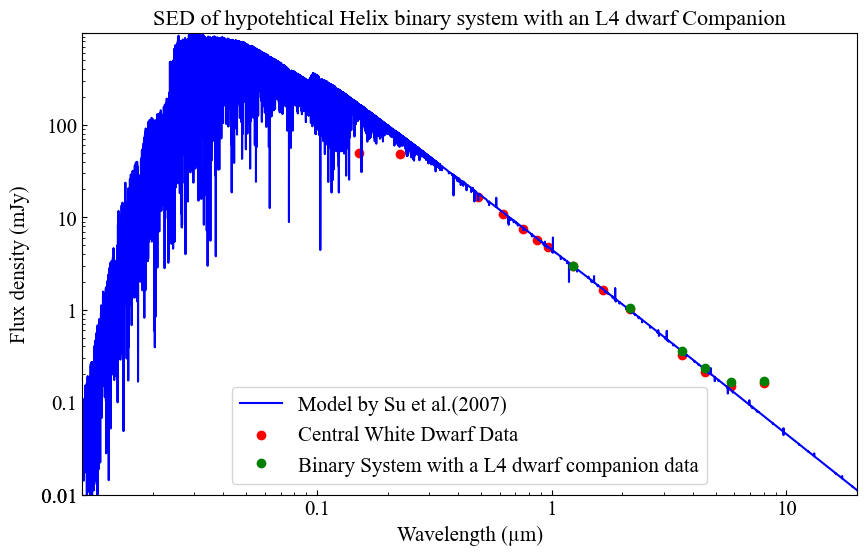

In [11]:
#L4 Dwarf Companion 
#Load the data from the provided content
data = {
    "Band": ["J", "K", "3.6", "4.5", "5.8", "8.0"],
    "Wavelength (microns)": [1.235, 2.159, 3.6, 4.5, 5.8, 8.0],
    "Flux density (mJy)": [ 2.966574432,1.042870472,0.361363522, 0.235012141, 0.164025517, 0.169212105],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Error bars: yerr will be the flux density error
# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue', label = 'Model by Su et al.(2007)')

# Plot the observational data as scatter points
plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Central White Dwarf Data')


plt.errorbar(df['Wavelength (microns)'], df['Flux density (mJy)'],  fmt='o', color='green', capsize=5, label = 'Binary System with a L4 dwarf companion data')

plt.title('SED of hypotehtical Helix binary system with an L4 dwarf Companion', fontsize = "16")
plt.xlabel('Wavelength (µm)', fontsize = "15")
plt.ylabel('Flux density (mJy)', fontsize = "15")
plt.loglog() 
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=15)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])
plt.legend(fontsize = "15")
# Display the plot
plt.show()

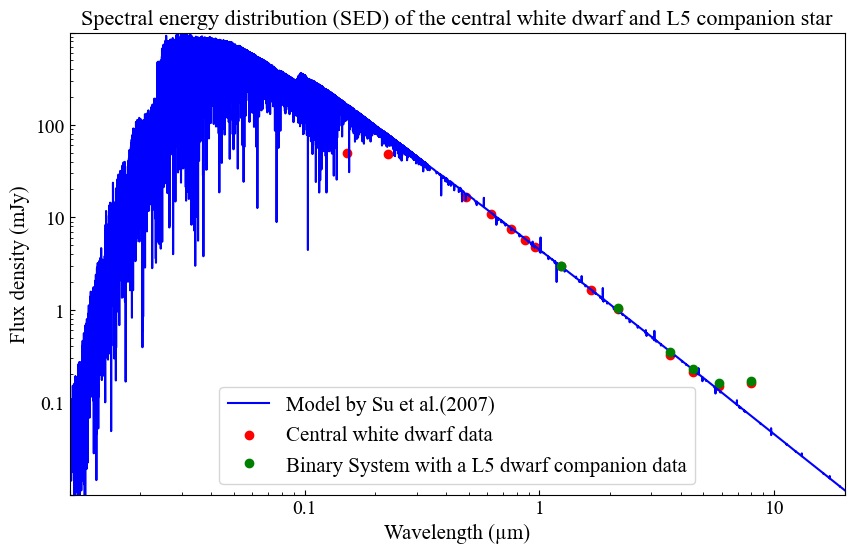

In [12]:
#L5 Dwarf Companion 
#Load the data from the provided content
data = {
    "Band": ["J", "K", "3.6", "4.5", "5.8", "8.0"],
    "Wavelength (microns)": [1.235, 2.159, 3.6, 4.5, 5.8, 8.0],
    "Flux density (mJy)": [ 2.960122659,1.031091125,0.349471801, 0.227950726, 0.159609461, 0.167250349],
}


# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Error bars: yerr will be the flux density error
# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue', label = 'Model by Su et al.(2007)')

# Plot the observational data as scatter points
plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Central white dwarf data')


plt.errorbar(df['Wavelength (microns)'], df['Flux density (mJy)'],  fmt='o', color='green', capsize=5, label = 'Binary System with a L5 dwarf companion data')

plt.title('Spectral energy distribution (SED) of the central white dwarf and L5 companion star', fontsize=16)
plt.xlabel('Wavelength (µm)', fontsize=15)
plt.ylabel('Flux density (mJy)', fontsize=15)


# Using loglog scale and setting limits
plt.loglog() 
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=14)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' ' ,'0.1', '1', '10', '100', ''])


plt.legend(fontsize=15)
# Display the plot
plt.show()

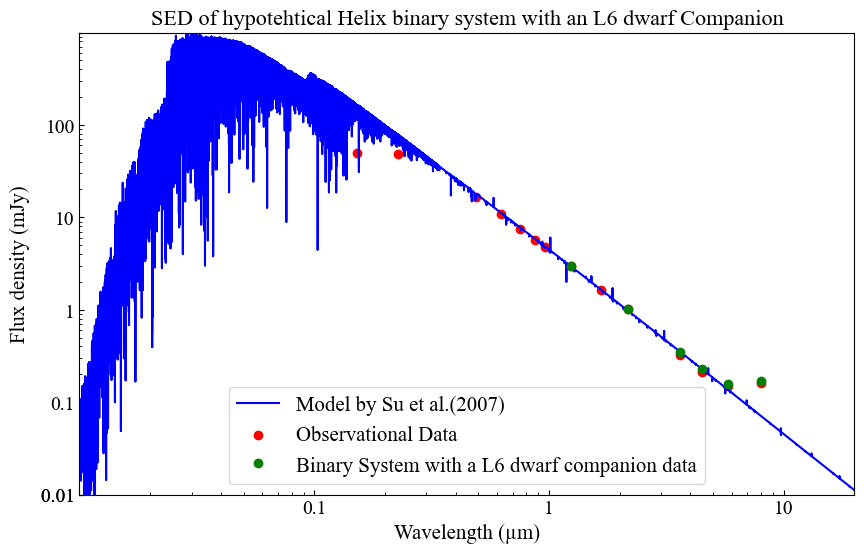

In [13]:
#L6 Dwarf Companion 
#Load the data from the provided content
data = {
    "Band": ["J", "K", "3.6", "4.5", "5.8", "8.0"],
    "Wavelength (microns)": [1.235, 2.159, 3.6, 4.5, 5.8, 8.0],
    "Flux density (mJy)": [ 2.956723343,1.026229043,0.345354758, 0.225435472, 0.157745678, 0.167118015],
}


# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Error bars: yerr will be the flux density error
# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue', label = 'Model by Su et al.(2007)')

# Plot the observational data as scatter points
plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Observational Data')


plt.errorbar(df['Wavelength (microns)'], df['Flux density (mJy)'],  fmt='o', color='green', capsize=5, label = 'Binary System with a L6 dwarf companion data')

plt.title('SED of hypotehtical Helix binary system with an L6 dwarf Companion', fontsize = "16")
plt.xlabel('Wavelength (µm)', fontsize = "15")
plt.ylabel('Flux density (mJy)', fontsize = "15")
plt.loglog() 
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=14)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])
plt.legend(fontsize = "15")
# Display the plot
plt.show()

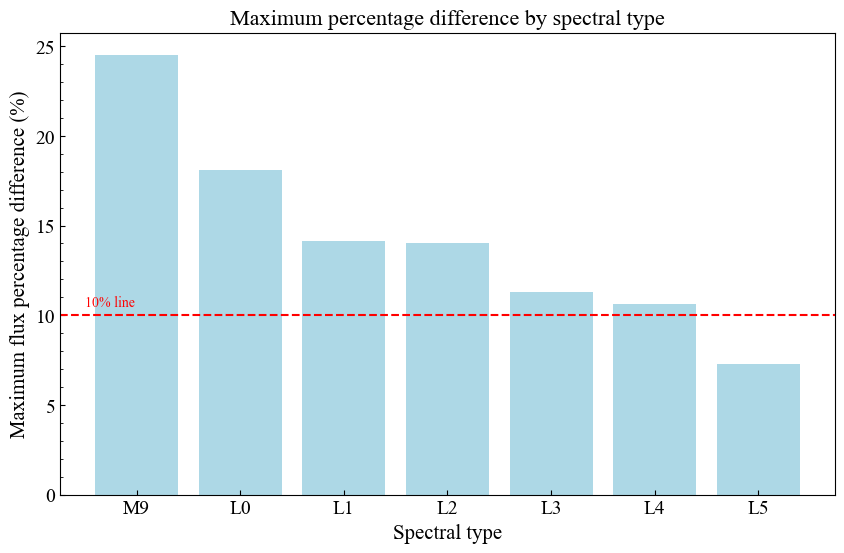

In [14]:
from matplotlib.ticker import MultipleLocator

# Maximum percentage difference data 
spectral_types = ['M9', 'L0', 'L1', 'L2', 'L3', 'L4', 'L5']
maximum_percentage_differences = [24.53, 18.09, 14.15, 14.03, 11.31, 10.6, 7.3 ]

# Plotting the data
plt.figure(figsize=(10,6))
plt.bar(spectral_types, maximum_percentage_differences, color='lightblue')
plt.axhline(y=10, color='r', linestyle='--')
plt.text(x=-0.5, y=10.5, s='10% line', color='r')

# Adding labels and title
plt.xlabel('Spectral type', fontsize="15")
plt.ylabel('Maximum flux percentage difference (%)', fontsize="15")
plt.title('Maximum percentage difference by spectral type', fontsize='16')
plt.tick_params(direction='in', which='both', labelsize = 14)
y_minor_tick_interval = 1  # Adjust the interval as needed
# Add minor ticks to the plot
ax = plt.gca()  # Get the current axes
ax.yaxis.set_minor_locator(MultipleLocator(y_minor_tick_interval))
# Showing the plot
plt.show()
